# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_def_test/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = 'control_cmaq.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-19-00:00:00',
  'end_time': '2019-08-20-00:00:00',
  'download_maps': False},
 'model': {'cmaq_oper': {'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_oper/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 18000,
   'mapping': {'airnow': {'PM25_TOT': 'PM2.5'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'dodgerblue', 'marker': '+', 'linestyle': '-.'}},
  'cmaq_expt': {'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0818/aqm.20190818.t12z.aconc-pm25.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 18000,
   'mapping': {'airnow': {'PM25_TOT': 'PM2.5'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}}},
 'obs': {'airnow': {'use_airnow': True,
   'filename': 'data/AIRNOW_20190831_20190831.nc',
   'obs_type': 'pt_sfc',
   'variables': {'PM2.5': {'unit_scale': 1,
     'unit_scale_method': '*',
     'na

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

cmaq_oper
{'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_oper/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 18000, 'mapping': {'airnow': {'PM25_TOT': 'PM2.5'}}, 'projection': 'None', 'plot_kwargs': {'color': 'dodgerblue', 'marker': '+', 'linestyle': '-.'}}
/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_oper/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf


/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_def_test/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


cmaq_expt
{'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0818/aqm.20190818.t12z.aconc-pm25.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 18000, 'mapping': {'airnow': {'PM25_TOT': 'PM2.5'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}}
/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0818/aqm.20190818.t12z.aconc-pm25.ncf


/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_def_test/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [5]:
an.models

{'cmaq_oper': <driver.model at 0x7f834ca26e80>,
 'cmaq_expt': <driver.model at 0x7f8335424c50>}

In [6]:
an.models['cmaq_oper'].obj

<xarray.Dataset>
Dimensions:    (DATE-TIME: 2, VAR: 20, time: 48, x: 442, y: 265, z: 1)
Coordinates:
  * time       (time) datetime64[ns] 2019-08-18T13:00:00 ... 2019-08-20T12:00:00
    longitude  (y, x) float64 -120.6 -120.5 -120.4 ... -58.98 -58.83 -58.69
    latitude   (y, x) float64 21.89 21.92 21.95 21.97 ... 47.88 47.84 47.79
Dimensions without coordinates: DATE-TIME, VAR, x, y, z
Data variables: (12/25)
    TFLAG      (time, VAR, DATE-TIME) int32 ...
    O3         (time, z, y, x) float32 26.73 26.43 26.28 ... 40.74 37.52 34.88
    CO         (time, z, y, x) float32 79.89 79.71 79.18 ... 110.7 101.9 92.01
    NO         (time, z, y, x) float32 2.989e-08 3.371e-08 ... 0.02528 0.01586
    NO2        (time, z, y, x) float32 0.01018 0.009075 ... 0.5464 0.298
    NOX        (time, z, y, x) float32 0.01018 0.009075 ... 0.5717 0.3139
    ...         ...
    PM25_SO4   (time, z, y, x) float32 ...
    PMC_TOT    (time, z, y, x) float32 ...
    PM25       (time, z, y, x) float32 ...
    PM10       (time, z, y, x) float32 ...
    NOy        (time, z, y, x) float32 1.018e-05 9.075e-06 ... 0.0003139
    NOx        (time, z, y, x) float32 1.018e-05 9.075e-06 ... 0.0003297
Attributes: (12/34)
    IOAPI_VERSION:  $Id:: init3.F 29 2014-08-07 14:31:02Z coats              ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2019230
    CTIME:          153727
    WDATE:          2019230
    ...             ...
    GDNAM:          AQF_CONUS_5x    
    UPNAM:          csum            
    VAR-LIST:       O3              CO              NO              NO2      ...
    FILEDESC:                                                                ...
    HISTORY:        
    proj4_srs:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [7]:
#All the info in the model class can be called here.
print(an.models['cmaq_oper'].label)
print(an.models['cmaq_oper'].mapping)

cmaq_oper
{'airnow': {'PM25_TOT': 'PM2.5'}}


In [8]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)
print(an.download_maps)

2019-08-19 00:00:00
2019-08-20 00:00:00
False


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [9]:
an.open_obs()

In [10]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

<xarray.Dataset>
Dimensions:     (time: 2163, x: 3790, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3783 3784 3785 3786 3787 3788 3789
  * time        (time) datetime64[ns] 2019-08-01 ... 2019-08-31T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2Y        (time, y, x) float64 ...
    ...          ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

In [11]:
#This just pairs the data
an.pair_data()

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s


Reference std: 4.6498646043406255
Reference std: 3.0691964002503607


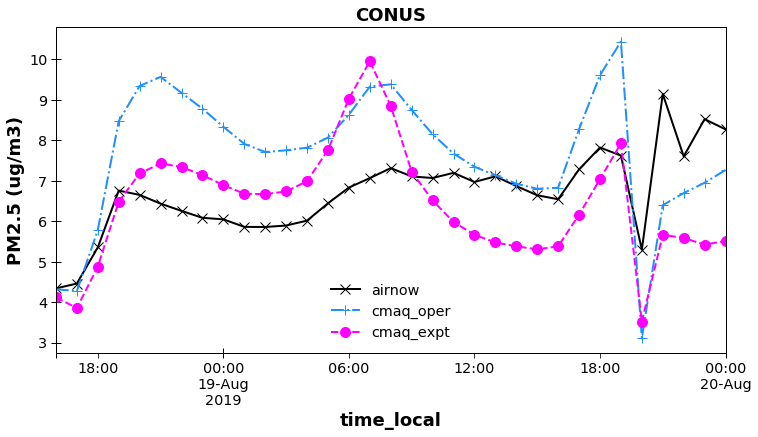

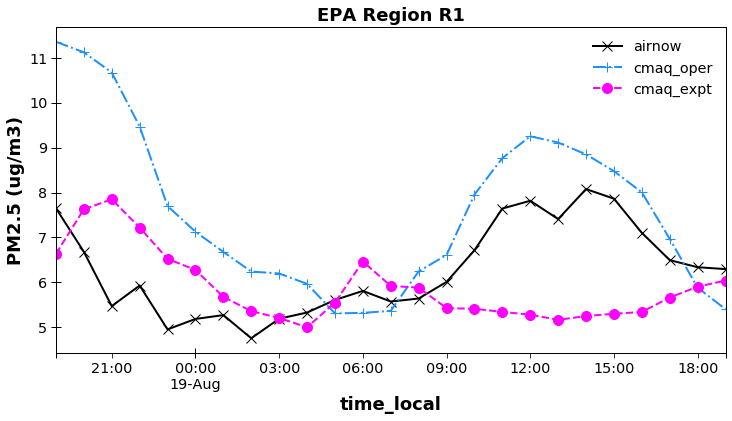

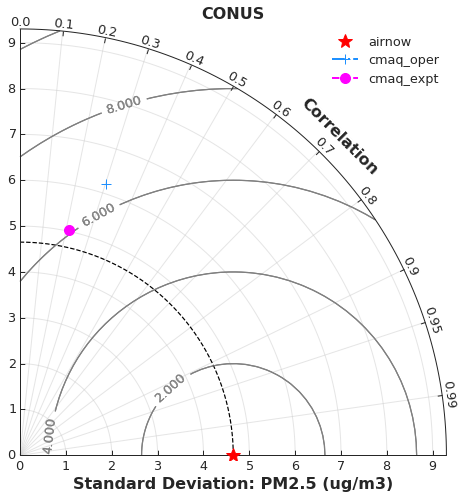

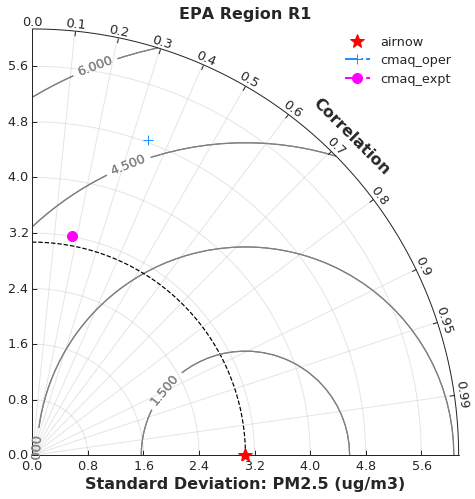

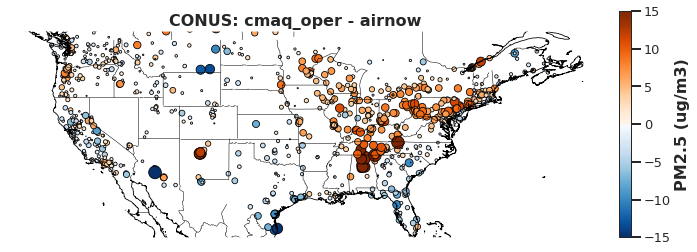

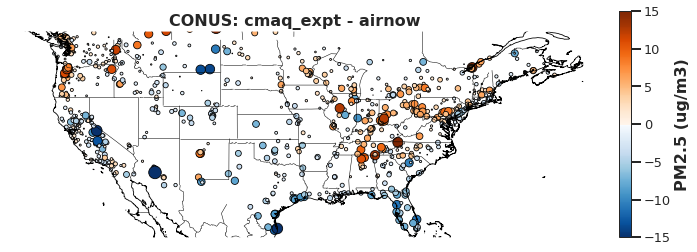

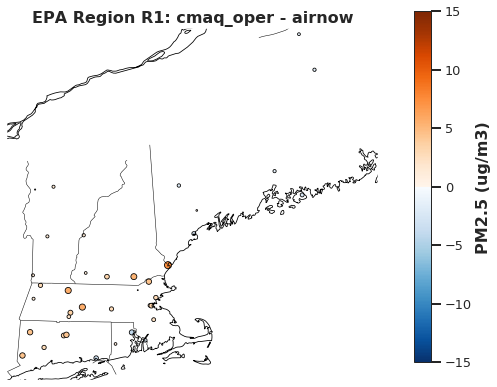

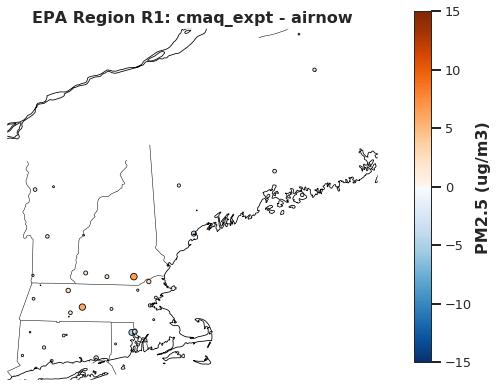

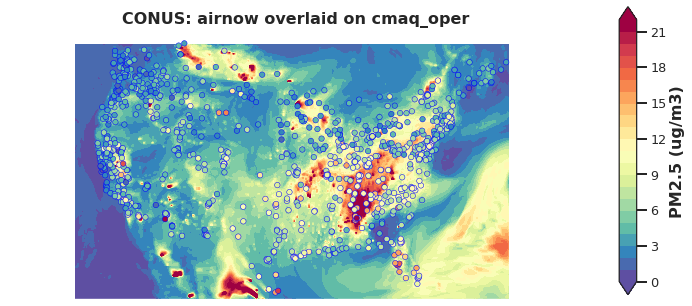

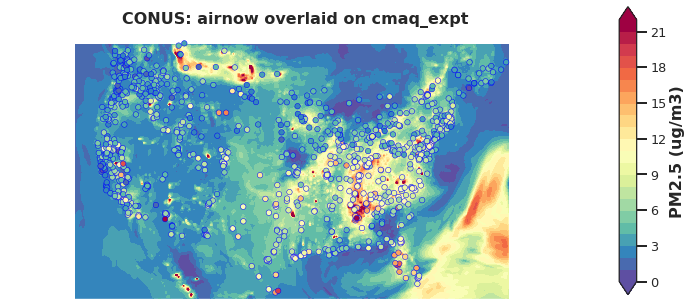

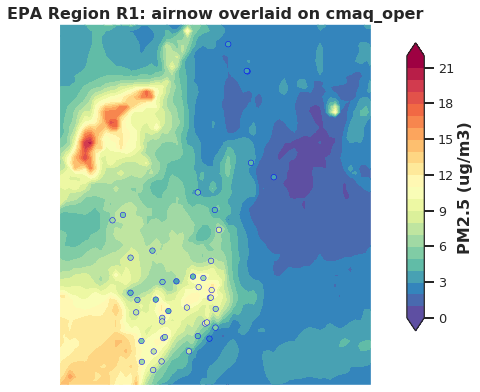

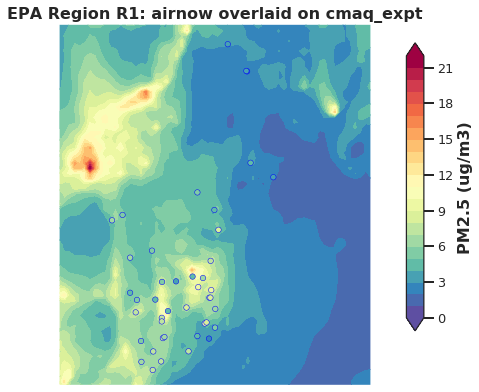

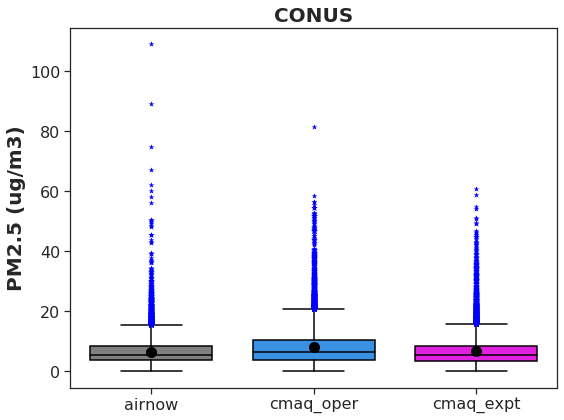

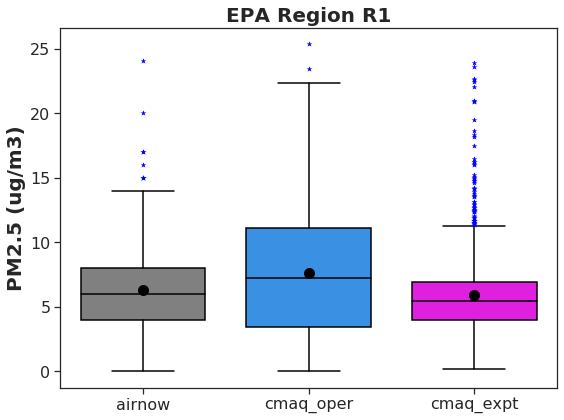

In [12]:
#And this generates all the plots.
an.plotting()